In [167]:
%reload_ext autoreload
from torchvision.transforms import transforms 
from PIL import Image, ImageFile
import torch
from PIL import ImageFile
from torchvision import models
import torch.nn as nn
from torchvision.models.resnet  import ResNet18_Weights
from constants import categories , category_to_label , label_to_char ,get_data_by_category , model_input_size

In [168]:

model_path = "clas_model.pt"
ImageFile.LOAD_TRUNCATED_IMAGES = True
num_classes = 24
model = torch.load(model_path , map_location=torch.device('cpu'))
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [169]:


path = "./training/crops/train/100/10410_17581.jpg"
# transform the img
image = Image.open(path).convert("RGB")
preprocess = transforms.Compose([
    transforms.Resize(model_input_size),
    transforms.ToTensor(),
])

input_tensor : torch.Tensor = preprocess(image)
input_batch = input_tensor.unsqueeze(0)



result : torch.Tensor = model(input_batch)


In [170]:
max_3 : torch.Tensor =torch.topk(result , 3)
max_3_indexes = max_3.indices.flatten().numpy()
predictions = list(map(lambda index : get_data_by_category(categories[index]) , max_3_indexes))
images = [image for p in predictions]
estimations = max_3.values.flatten().detach().numpy()


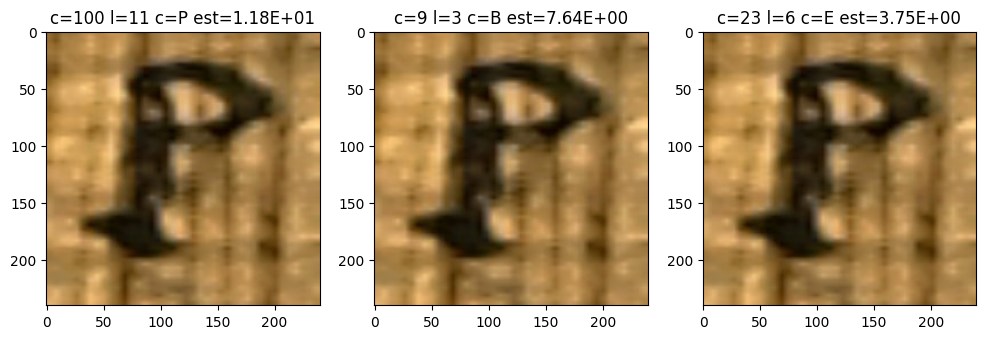

In [171]:
%matplotlib inline
import matplotlib.pyplot as plt 
_, axs = plt.subplots(1, len(images), figsize=(12, 12))
axs = axs.flatten()
for img, ax , pred , est in zip(images, axs, predictions , estimations):
    category , label , char = pred
    est = "{:.2E}".format(est)
    ax.imshow(img)
    ax.set_title(f"c={category} l={label} c={char} est={est}")
plt.show()



